# EXPERIMENT 2.2
# NAME - SOUMOBRATA MANNA
# UID - 21MCA2484
# SEC - 8 A
# SUBJECT CODE - 21CAP - 703
# SUBJECT NAME - MACHINE LEARNING LAB

# Q : Use Naive bayes classifer for two class and multi class dataset. Compare the accuracy of the model.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Dividing the same dataset with 2 different types of variables name for dividing into 2 parts 

In [2]:
#For Binary Class Classification
binary_data = pd.read_csv('/Users/soumobratamanna/Documents/Data_Science_Projects/tensorflow-test/train.csv')

In [3]:
#For Multi Class Classification
multi_class_data = pd.read_csv('/Users/soumobratamanna/Documents/Data_Science_Projects/tensorflow-test/train.csv')

# Implementing Naive Bayes Classifier for Binary Classification

In [4]:
binary_data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [5]:
binary_data.tail(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8058,460674,Female,No,31,Yes,Entertainment,0.0,Low,3.0,Cat_3,A
8059,460132,Male,No,39,Yes,Healthcare,3.0,Low,2.0,Cat_6,D
8060,463613,Female,Yes,48,Yes,Artist,0.0,Average,6.0,Cat_6,A
8061,465231,Male,Yes,65,No,Artist,0.0,Average,2.0,Cat_6,C
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


In [6]:
binary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
binary_data = binary_data.drop(['ID','Var_1'],axis=1)

In [8]:
binary_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
binary_data['Ever_Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
binary_data['Graduated'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
binary_data['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [12]:
binary_data['Spending_Score'].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [13]:
binary_data['Segmentation'].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [14]:
#Removing C and D from the segmentation column
indexes = binary_data[(binary_data['Segmentation'] == 'C') | (binary_data['Segmentation'] == 'D')].index
binary_data.drop(indexes, inplace = True)


In [15]:
#Encoding the object varibales to numeric 
binary_data.replace({'Gender':{'Male':1,'Female':2},'Ever_Married':{'No':0,'Yes':1},'Graduated':{'No':0,'Yes':1},
              'Profession':{'Healthcare':1,'Engineer':2,'Lawyer':3,'Doctor':4,'Artist':5,'Executive':6
                            ,'Entertainment':7,'Homemaker':8,'Marketing':9},
              'Spending_Score':{'Low':0,'High':1,'Average':2},'Segmentation':{'A':1,'B':2}}, inplace = True)

In [16]:
#checking for null values 
binary_data.isnull().sum()

Gender               0
Ever_Married        65
Age                  0
Graduated           42
Profession          55
Work_Experience    386
Spending_Score       0
Family_Size        138
Segmentation         0
dtype: int64

<AxesSubplot:>

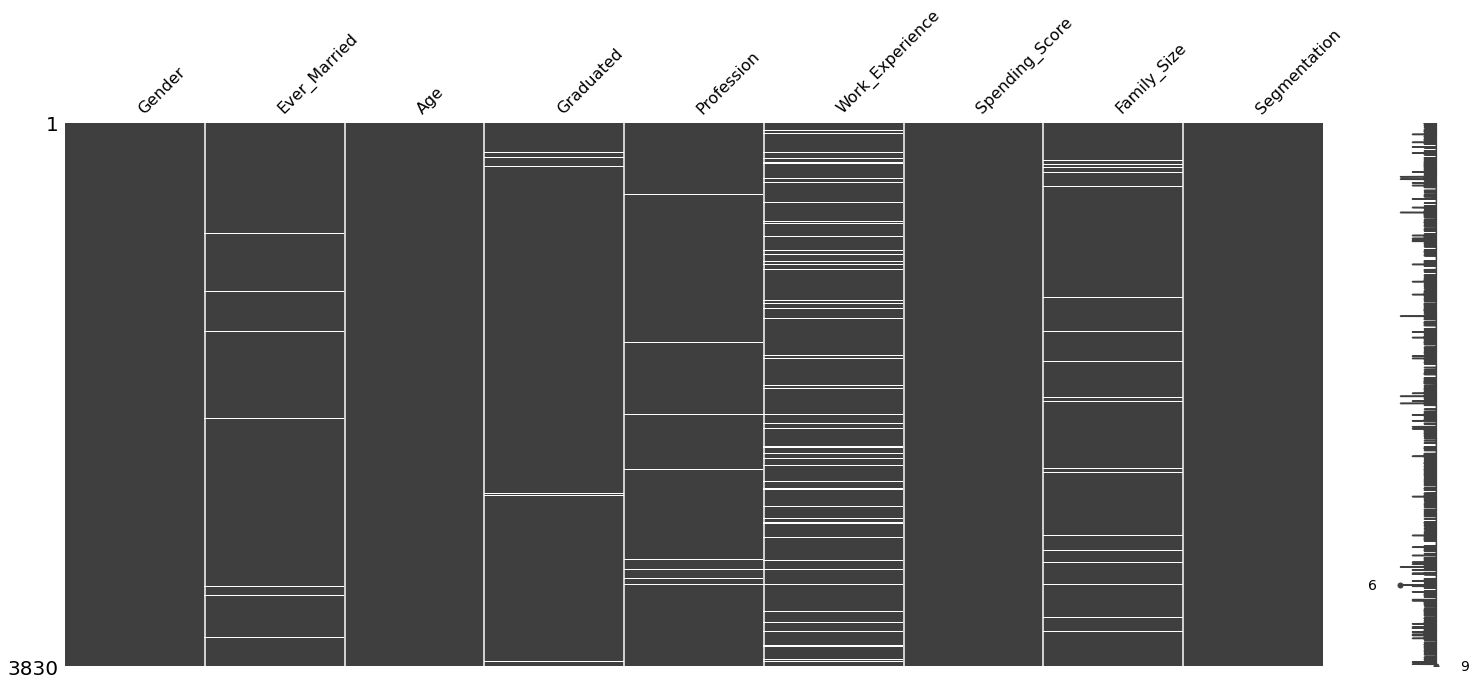

In [17]:
#Visualizing the null values
msno.matrix(binary_data)

In [18]:
binary_data[['Ever_Married','Graduated','Profession','Work_Experience','Family_Size']] = binary_data[['Ever_Married','Graduated','Profession','Work_Experience'
,'Family_Size']].fillna(binary_data[['Ever_Married','Graduated','Profession','Work_Experience','Family_Size']].mean())

In [19]:
binary_data.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

<AxesSubplot:>

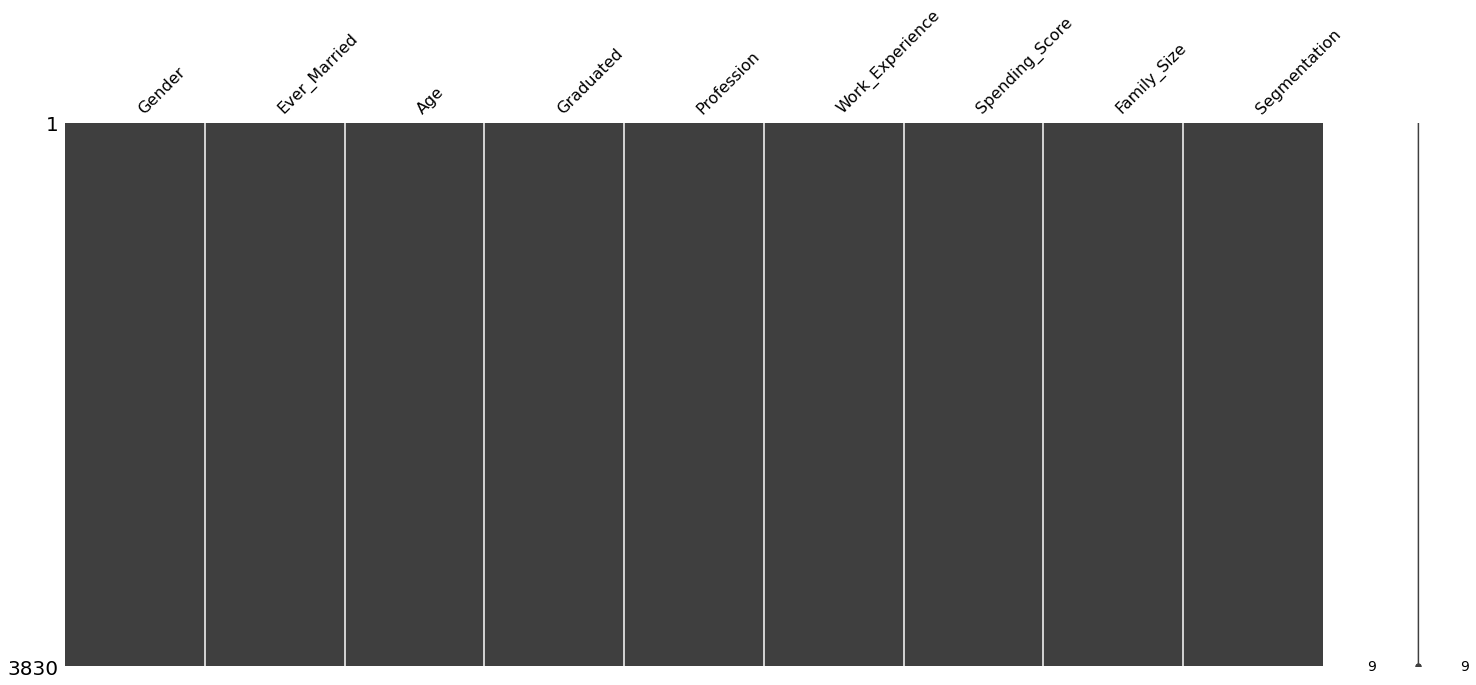

In [20]:
#Visualizing the null values
msno.matrix(binary_data)

Segmentation
1    51.488251
2    48.511749
Name: Segmentation, dtype: float64


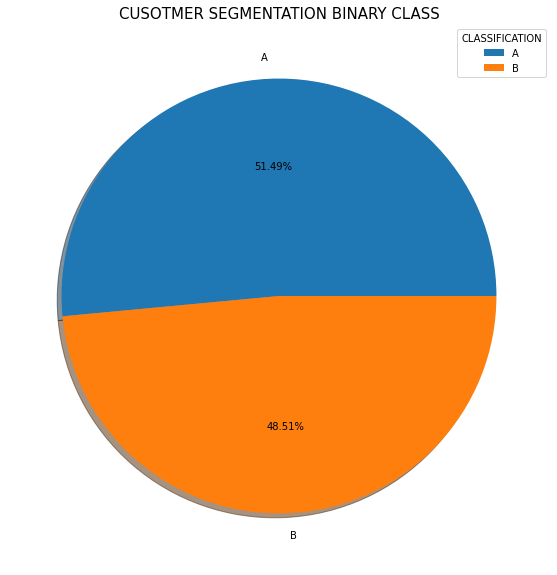

In [21]:
plt.figure(figsize = (15,10))
percent = binary_data.groupby('Segmentation')['Segmentation'].count()/binary_data['Segmentation'].count()*100
print(percent)
labels_data = ['A','B'] 
plt.pie(percent,labels=labels_data , autopct = '%1.2f%%', shadow = True)
plt.title('CUSOTMER SEGMENTATION BINARY CLASS', size = 15)
plt.legend(title = 'CLASSIFICATION')
plt.show()

<AxesSubplot:>

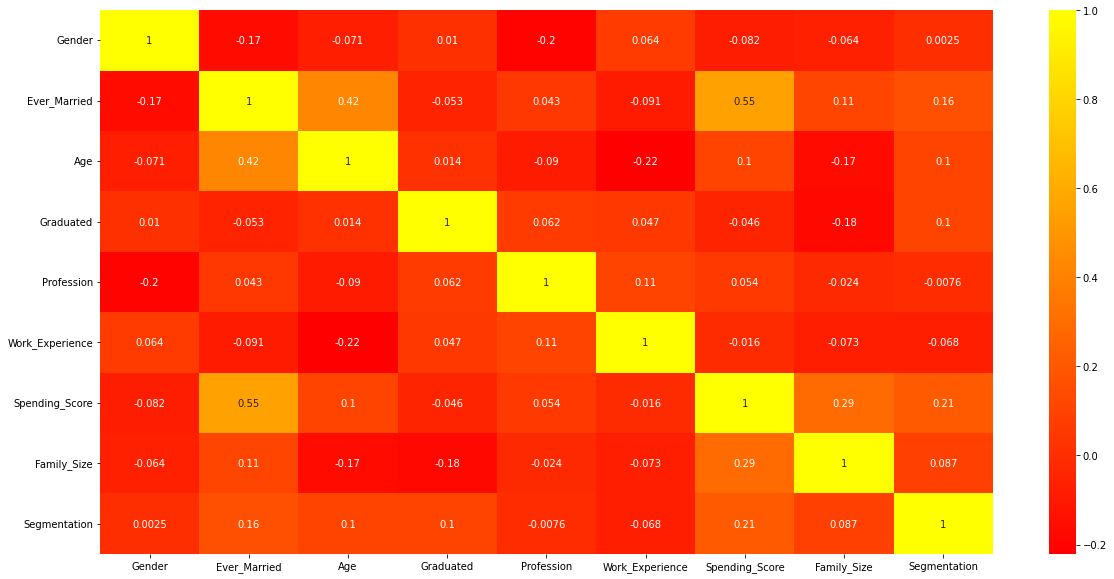

In [22]:
plt.figure(figsize = (20,10))
sns.heatmap(binary_data.corr(), annot= True, cmap= "autumn")

In [23]:
#Dividing the dataset between independent and dependent variables 

X = binary_data.iloc[:,:-1]
Y = binary_data.iloc[:,-1]

In [24]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
1,2,1.0,38,1.0,2.0,2.634437,2,3.0
2,2,1.0,67,1.0,2.0,1.000000,0,1.0
3,1,1.0,67,1.0,3.0,0.000000,1,2.0
4,2,1.0,40,1.0,7.0,2.634437,1,6.0
10,2,0.0,26,1.0,2.0,1.000000,0,3.0
...,...,...,...,...,...,...,...,...
8058,2,0.0,31,1.0,7.0,0.000000,0,3.0
8060,2,1.0,48,1.0,5.0,0.000000,2,6.0
8062,1,1.0,41,1.0,5.0,0.000000,1,5.0
8066,2,0.0,27,1.0,1.0,1.000000,0,4.0


In [25]:
Y

1       1
2       2
3       2
4       1
10      1
       ..
8058    1
8060    1
8062    2
8066    2
8067    2
Name: Segmentation, Length: 3830, dtype: int64

In [26]:
#Splitting the daatset between training and testing 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [27]:
X_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
2705,2,1.0,36,1.000000,5.000000,1.0,2,2.000000
7589,1,1.0,51,0.000000,7.000000,1.0,0,3.000000
2501,2,1.0,81,0.000000,3.000000,1.0,0,2.566089
1803,1,0.0,38,1.000000,5.000000,0.0,0,1.000000
1120,1,1.0,49,1.000000,7.000000,1.0,2,3.000000
...,...,...,...,...,...,...,...,...
2355,1,0.0,32,0.000000,7.000000,9.0,0,4.000000
2706,1,0.0,35,1.000000,5.000000,1.0,0,2.000000
1808,1,1.0,53,1.000000,5.000000,0.0,2,4.000000
7337,2,1.0,48,1.000000,2.000000,0.0,1,5.000000


In [28]:
X_test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
6094,2,1.0,52,1.0,5.0,3.0,0,2.0
7767,2,0.0,19,1.0,5.0,0.0,0,2.0
4101,1,1.0,65,1.0,7.0,1.0,0,1.0
7566,1,1.0,47,1.0,7.0,2.0,2,3.0
3518,1,1.0,36,1.0,5.0,8.0,2,2.0
...,...,...,...,...,...,...,...,...
2219,1,0.0,43,1.0,5.0,1.0,0,2.0
196,2,1.0,31,1.0,5.0,0.0,2,2.0
582,1,1.0,57,1.0,7.0,8.0,2,5.0
2552,1,1.0,28,0.0,7.0,0.0,2,2.0


In [29]:
#Scaling down the values 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train

array([[ 1.08694449,  0.71654035, -0.67265322, ..., -0.49110029,
         1.59473932, -0.40012388],
       [-0.92001018,  0.71654035,  0.27883286, ..., -0.49110029,
        -0.77592667,  0.28944942],
       [ 1.08694449,  0.71654035,  2.18180503, ..., -0.49110029,
        -0.77592667, -0.00976413],
       ...,
       [-0.92001018,  0.71654035,  0.40569767, ..., -0.79872738,
         1.59473932,  0.97902272],
       [ 1.08694449,  0.71654035,  0.08853564, ..., -0.79872738,
         0.40940632,  1.66859603],
       [ 1.08694449, -1.41577643, -0.3554912 , ..., -0.18347319,
        -0.77592667, -1.08969719]])

In [31]:
X_test

array([[ 1.08694449,  0.71654035,  0.34226527, ...,  0.12415391,
        -0.77592667, -0.40012388],
       [ 1.08694449, -1.41577643, -1.75100412, ..., -0.79872738,
        -0.77592667, -0.40012388],
       [-0.92001018,  0.71654035,  1.16688654, ..., -0.49110029,
        -0.77592667, -1.08969719],
       ...,
       [-0.92001018,  0.71654035,  0.6594273 , ...,  1.66228939,
         1.59473932,  1.66859603],
       [-0.92001018,  0.71654035, -1.18011247, ..., -0.79872738,
         1.59473932, -0.40012388],
       [-0.92001018,  0.71654035,  1.92807541, ..., -0.49110029,
         0.40940632, -0.40012388]])

In [32]:
#Fitting the model 
from sklearn.naive_bayes import GaussianNB

binary_model = GaussianNB()

In [33]:
binary_model.fit(X_train,Y_train)

GaussianNB()

In [34]:
#Predictions 
binary_predictions = binary_model.predict(X_test)

In [35]:
binary_predictions

array([2, 1, 2, ..., 2, 2, 2])

In [36]:
#Evaluations/Performance Metrics 

from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
binary_cm = confusion_matrix(Y_test,binary_predictions)
binary_score = accuracy_score(Y_test,binary_predictions)
binary_cr = classification_report(Y_test,binary_predictions)

In [37]:
binary_cm

array([[379, 211],
       [220, 339]])

In [38]:
binary_score

0.6248912097476066

In [39]:
print(binary_cr)

              precision    recall  f1-score   support

           1       0.63      0.64      0.64       590
           2       0.62      0.61      0.61       559

    accuracy                           0.62      1149
   macro avg       0.62      0.62      0.62      1149
weighted avg       0.62      0.62      0.62      1149



# Implementing Naive Bayes Classifier for Multi Class Classification

In [40]:
multi_class_data.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [41]:
multi_class_data.tail(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8058,460674,Female,No,31,Yes,Entertainment,0.0,Low,3.0,Cat_3,A
8059,460132,Male,No,39,Yes,Healthcare,3.0,Low,2.0,Cat_6,D
8060,463613,Female,Yes,48,Yes,Artist,0.0,Average,6.0,Cat_6,A
8061,465231,Male,Yes,65,No,Artist,0.0,Average,2.0,Cat_6,C
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


In [42]:
multi_class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [43]:
multi_class_data = multi_class_data.drop(['ID','Var_1'],axis=1)

In [44]:
multi_class_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [45]:
multi_class_data['Ever_Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [46]:
multi_class_data['Graduated'].unique()

array(['No', 'Yes', nan], dtype=object)

In [47]:
multi_class_data['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [48]:
multi_class_data['Spending_Score'].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [49]:
multi_class_data['Segmentation'].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [50]:
#Encoding the object varibales to numeric 
multi_class_data.replace({'Gender':{'Male':1,'Female':2},'Ever_Married':{'No':0,'Yes':1},'Graduated':{'No':0,'Yes':1},
              'Profession':{'Healthcare':1,'Engineer':2,'Lawyer':3,'Doctor':4,'Artist':5,'Executive':6
                            ,'Entertainment':7,'Homemaker':8,'Marketing':9},
              'Spending_Score':{'Low':0,'High':1,'Average':2},'Segmentation':{'A':1,'B':2,
                                                                        'C':3,'D':4}}, inplace = True)

In [51]:
#dataframe after encoding object variables to numeric data 
multi_class_data.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0.0,22,0.0,1.0,1.0,0,4.0,4
1,2,1.0,38,1.0,2.0,NaN,2,3.0,1
2,2,1.0,67,1.0,2.0,1.0,0,1.0,2
3,1,1.0,67,1.0,3.0,0.0,1,2.0,2
4,2,1.0,40,1.0,7.0,NaN,1,6.0,1
5,1,1.0,56,0.0,5.0,0.0,2,2.0,3
6,1,0.0,32,1.0,1.0,1.0,0,3.0,3
7,2,0.0,33,1.0,1.0,1.0,0,3.0,4
8,2,1.0,61,1.0,2.0,0.0,0,3.0,4
9,2,1.0,55,1.0,5.0,1.0,2,4.0,3


In [52]:
#checking for null values 
multi_class_data.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

<AxesSubplot:>

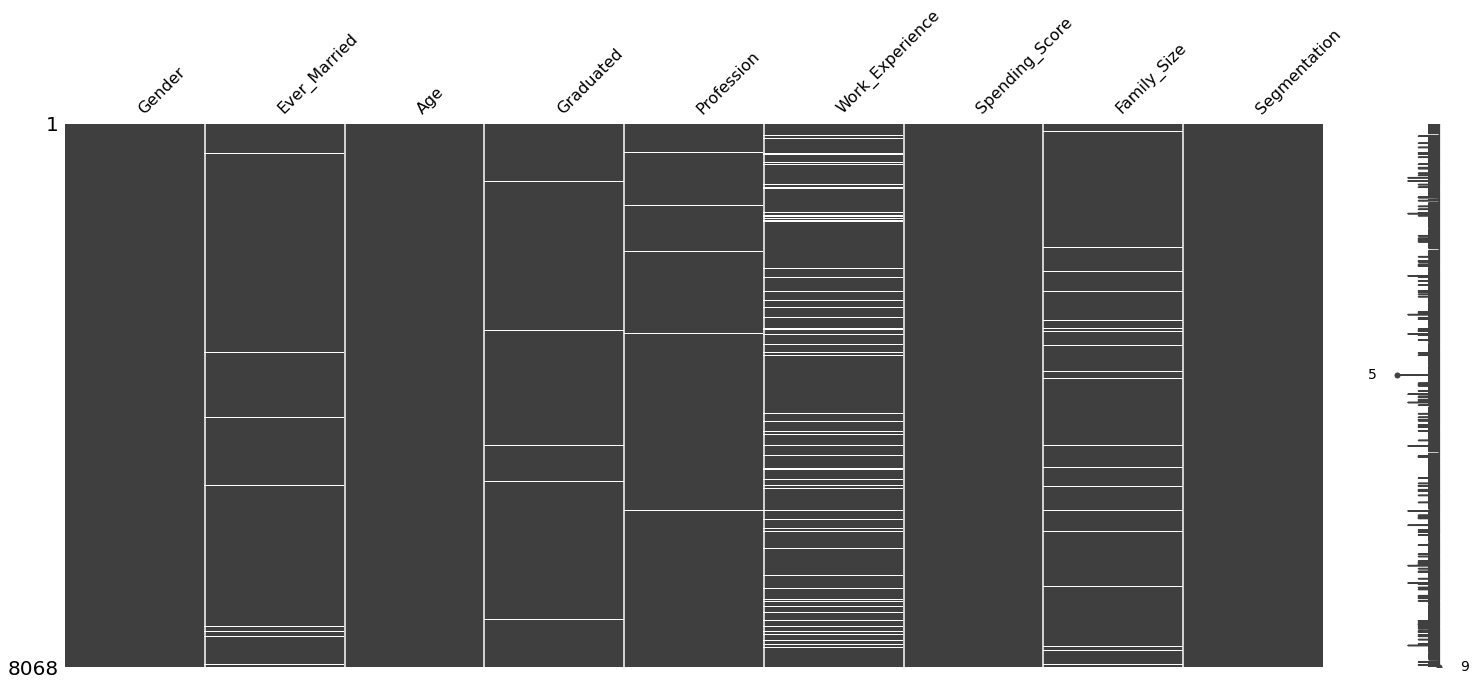

In [53]:
#Visualizing the null values
msno.matrix(multi_class_data)

In [54]:
multi_class_data[['Ever_Married','Graduated','Profession','Work_Experience','Family_Size']] = multi_class_data[['Ever_Married','Graduated','Profession','Work_Experience'
,'Family_Size']].fillna(multi_class_data[['Ever_Married','Graduated','Profession','Work_Experience','Family_Size']].mean())

In [55]:
multi_class_data.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

<AxesSubplot:>

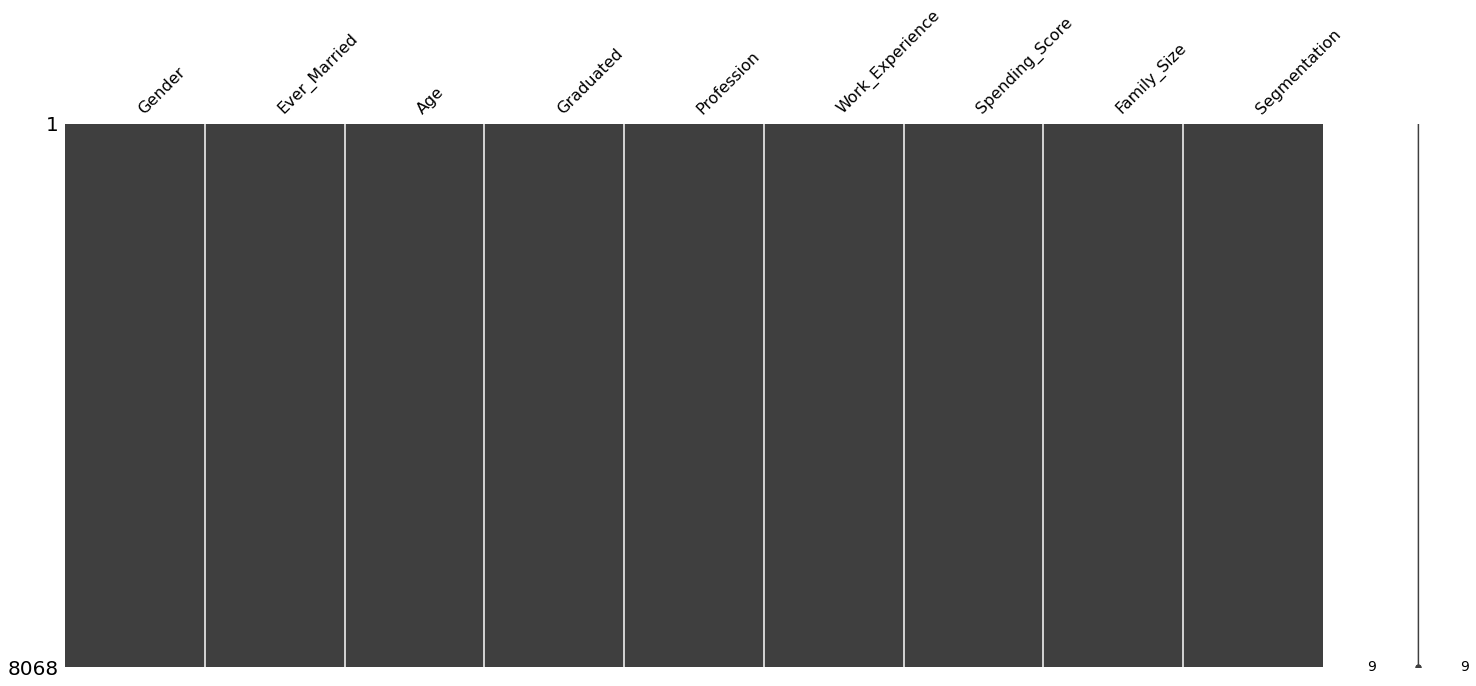

In [56]:
#Visualizing the null values
msno.matrix(multi_class_data)

Segmentation
1    24.442241
2    23.029251
3    24.417452
4    28.111056
Name: Segmentation, dtype: float64


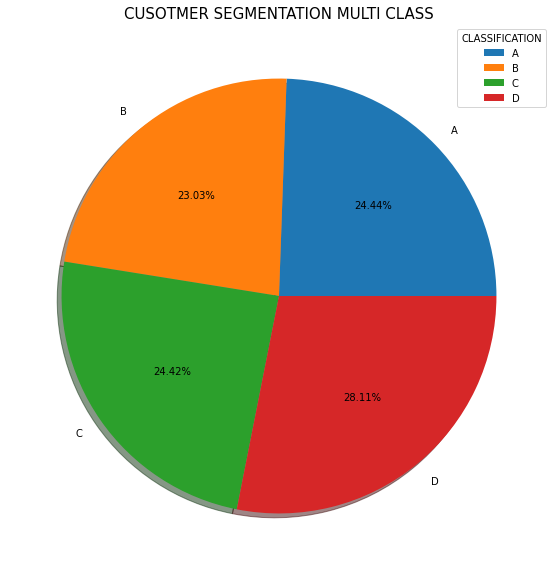

In [57]:
plt.figure(figsize = (15,10))
percent = multi_class_data.groupby('Segmentation')['Segmentation'].count()/multi_class_data['Segmentation'].count()*100
print(percent)
labels_data = ['A','B','C','D'] 
plt.pie(percent,labels=labels_data , autopct = '%1.2f%%', shadow = True)
plt.title('CUSOTMER SEGMENTATION MULTI CLASS', size = 15)
plt.legend(title = 'CLASSIFICATION')
plt.show()

<AxesSubplot:>

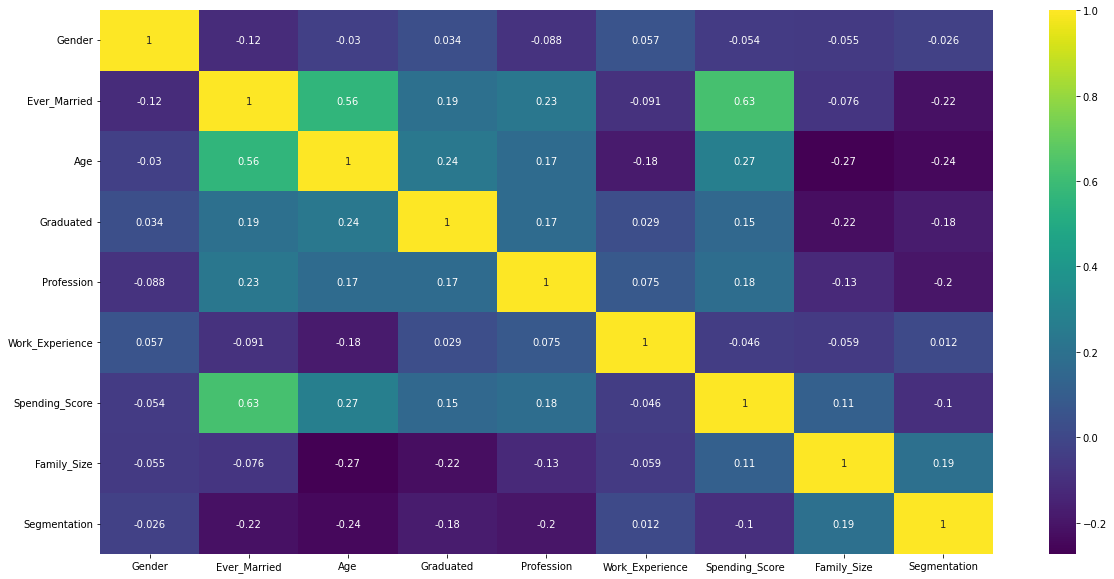

In [58]:
plt.figure(figsize = (20,10))
sns.heatmap(multi_class_data.corr(), annot= True, cmap= "viridis")

In [59]:
#Dividing the dataset between independent and dependent variables 

X = multi_class_data.iloc[:,:-1]
Y = multi_class_data.iloc[:,-1]

In [60]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0.0,22,0.0,1.000000,1.000000,0,4.0
1,2,1.0,38,1.0,2.000000,2.641663,2,3.0
2,2,1.0,67,1.0,2.000000,1.000000,0,1.0
3,1,1.0,67,1.0,3.000000,0.000000,1,2.0
4,2,1.0,40,1.0,7.000000,2.641663,1,6.0
...,...,...,...,...,...,...,...,...
8063,1,0.0,22,0.0,4.376133,0.000000,0,7.0
8064,1,0.0,35,0.0,6.000000,3.000000,0,4.0
8065,2,0.0,33,1.0,1.000000,1.000000,0,1.0
8066,2,0.0,27,1.0,1.000000,1.000000,0,4.0


In [61]:
Y

0       4
1       1
2       2
3       2
4       1
       ..
8063    4
8064    4
8065    4
8066    2
8067    2
Name: Segmentation, Length: 8068, dtype: int64

In [62]:
#Splitting the daatset between training and testing 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [63]:
X_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
5015,1,1.0,49,1.0,7.0,1.000000,0,2.0
5755,1,1.0,87,1.0,3.0,0.000000,1,2.0
7781,2,0.0,28,1.0,1.0,8.000000,0,3.0
4518,2,1.0,39,1.0,8.0,2.641663,0,1.0
6195,1,0.0,19,0.0,1.0,1.000000,0,6.0
...,...,...,...,...,...,...,...,...
5226,1,1.0,29,1.0,1.0,0.000000,0,2.0
5390,1,0.0,31,0.0,1.0,1.000000,0,4.0
860,2,0.0,40,1.0,3.0,4.000000,0,1.0
7603,1,1.0,29,1.0,5.0,0.000000,0,5.0


In [64]:
X_test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
742,1,0.0,28,1.000000,7.0,2.641663,0,3.0
2127,2,1.0,29,1.000000,7.0,0.000000,2,2.0
2107,1,0.0,20,0.621777,1.0,4.000000,0,5.0
2943,1,1.0,51,1.000000,7.0,1.000000,2,4.0
4362,2,0.0,19,0.000000,7.0,1.000000,0,5.0
...,...,...,...,...,...,...,...,...
144,2,1.0,43,0.000000,2.0,0.000000,2,5.0
1340,1,1.0,38,0.000000,5.0,1.000000,2,3.0
5733,2,0.0,27,0.000000,4.0,2.641663,0,3.0
3187,2,1.0,40,1.000000,5.0,0.000000,0,1.0


In [65]:
#Scaling down the values 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
X_train

array([[-0.91130128,  0.85083819,  0.31833151, ..., -0.50802685,
        -0.75424085, -0.5716795 ],
       [-0.91130128,  0.85083819,  2.58458743, ..., -0.81535904,
         0.42591933, -0.5716795 ],
       [ 1.09733194, -1.19432414, -0.93407307, ...,  1.6432985 ,
        -0.75424085,  0.09251601],
       ...,
       [ 1.09733194, -1.19432414, -0.21841331, ...,  0.41396973,
        -0.75424085, -1.23587502],
       [-0.91130128,  0.85083819, -0.87443476, ..., -0.81535904,
        -0.75424085,  1.42090704],
       [ 1.09733194, -1.19432414, -0.99371139, ..., -0.50802685,
        -0.75424085,  4.0776891 ]])

In [67]:
X_test

array([[-0.91130128, -1.19432414, -0.93407307, ..., -0.00349089,
        -0.75424085,  0.09251601],
       [ 1.09733194,  0.85083819, -0.87443476, ..., -0.81535904,
         1.60607951, -0.5716795 ],
       [-0.91130128, -1.19432414, -1.41117958, ...,  0.41396973,
        -0.75424085,  1.42090704],
       ...,
       [ 1.09733194, -1.19432414, -0.99371139, ..., -0.00349089,
        -0.75424085,  0.09251601],
       [ 1.09733194,  0.85083819, -0.21841331, ..., -0.81535904,
        -0.75424085, -1.23587502],
       [-0.91130128,  0.85083819,  1.1532679 , ..., -0.00349089,
         1.60607951, -0.5716795 ]])

In [68]:
#Fitting the model 
from sklearn.naive_bayes import GaussianNB

multi_class_model = GaussianNB()

In [69]:
multi_class_model.fit(X_train,Y_train)

GaussianNB()

In [70]:
#Predictions 
multi_class_predictions = multi_class_model.predict(X_test)

In [71]:
multi_class_predictions

array([4, 3, 4, ..., 4, 2, 3])

In [72]:
#Evaluations/Performance Metrics 

from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
multi_cm = confusion_matrix(Y_test,multi_class_predictions)
multi_score = accuracy_score(Y_test,multi_class_predictions)
multi_cr = classification_report(Y_test,multi_class_predictions)

In [73]:
multi_cm

array([[170,  70, 148, 209],
       [ 96, 109, 258,  89],
       [ 46,  52, 379, 103],
       [ 91,  49,  38, 514]])

In [74]:
multi_score

0.48409748038000827

In [75]:
print(multi_cr)

              precision    recall  f1-score   support

           1       0.42      0.28      0.34       597
           2       0.39      0.20      0.26       552
           3       0.46      0.65      0.54       580
           4       0.56      0.74      0.64       692

    accuracy                           0.48      2421
   macro avg       0.46      0.47      0.45      2421
weighted avg       0.46      0.48      0.46      2421



# Comparison Report Analysis using Customer Segmentation Dataset

In [76]:
print("The Binary Class Classification report score using Naives Bayes : \n",binary_cr)

The Binary Class Classification report score using Naives Bayes : 
               precision    recall  f1-score   support

           1       0.63      0.64      0.64       590
           2       0.62      0.61      0.61       559

    accuracy                           0.62      1149
   macro avg       0.62      0.62      0.62      1149
weighted avg       0.62      0.62      0.62      1149



In [77]:
print("The Multi Class Classification report score using Naives Bayes : \n",multi_cr)

The Multi Class Classification report score using Naives Bayes : 
               precision    recall  f1-score   support

           1       0.42      0.28      0.34       597
           2       0.39      0.20      0.26       552
           3       0.46      0.65      0.54       580
           4       0.56      0.74      0.64       692

    accuracy                           0.48      2421
   macro avg       0.46      0.47      0.45      2421
weighted avg       0.46      0.48      0.46      2421



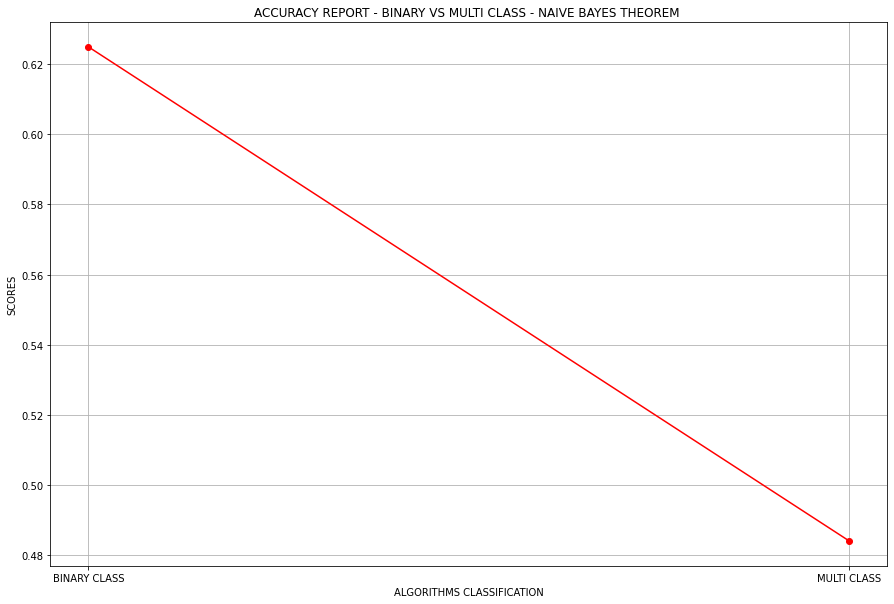

In [78]:
plt.figure(figsize = (15,10))
algorithm=["BINARY CLASS", "MULTI CLASS"]
Scores=[binary_score, multi_score]
plt.plot(algorithm,Scores, marker = 'o',color='red')
plt.grid()
plt.title("ACCURACY REPORT - BINARY VS MULTI CLASS - NAIVE BAYES THEOREM ")
plt.xlabel("ALGORITHMS CLASSIFICATION")
plt.ylabel("SCORES")
plt.show()